# Estudo de caso 5 - Processamento de Linguagem Natural (PLN)

### Lucas Zoser Nunes Costa RA: 22105593
### Leonardo Areias Rodovalho RA: 22101570
### Leonardo Benttes Almeida Placido dos Santos RA: 22103833
### Pedro Henrique Moreira da Silva RA: 22201914

* Efetuar a limpeza do texto, removendo números, underscores, espaços em branco e outros caracteres indesejados; 

* Remover as stop words;

* Executar lematização e stemização;

* Criar uma nuvem de palavras;

* Transformar o dataset para o formato numérico, de tal forma que ele possa ser aplicado em alguma algoritmo de aprendizagem. Para isso você pode utilizar o bag of words e TF-IDF (CountVectorizer e TfidfVectorizer);

* (Desafio – Opcional) Utilizando a saída do tópico anterior, treine um modelo utilizando o algoritmo RandomForestClassifier().

### Dataset: https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr/data


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("imdb-reviews-pt-br.csv")
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


* Efetuar a limpeza do texto, removendo números, underscores, espaços em branco e outros caracteres indesejados; 

In [3]:
import re

def limpeza(coluna):
    nova_col = coluna\
    .apply(lambda x: re.sub(r'\W+',' ', x))\
    .apply(lambda x: re.sub(r'(\d+)|(\d+\/*\d*)|[_]+','',x))\
    .apply(lambda x: x.lower())
    return nova_col

In [4]:
df['new_text_pt'] = limpeza(df['text_pt'])

In [5]:
df.head()

,id,text_en,text_pt,sentiment,new_text_pt
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,mais uma vez o sr costner arrumou um filme por...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,este é um exemplo do motivo pelo qual a maiori...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,primeiro de tudo eu odeio esses raps imbecis q...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,nem mesmo os beatles puderam escrever músicas ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,filmes de fotos de latão não é uma palavra apr...


* Remover as stop words;

In [6]:
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from spacy.lang.pt.stop_words import STOP_WORDS

In [7]:
#Tokenizando nossas frazes
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(df.new_text_pt[0][0:100])
#Limitamos o tamanho da frase [0][0:100] para melhor visualização
print(token_frase)

['mais', 'uma', 'vez', 'o', 'sr', 'costner', 'arrumou', 'um', 'filme', 'por', 'muito', 'mais', 'tempo', 'do', 'que', 'o', 'necessário', 'além', 'das', 'terríve']


In [8]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in df.new_text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
df["new_text_pt"] = frase_processada

In [9]:
df.head()

,id,text_en,text_pt,sentiment,new_text_pt
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,vez sr costner arrumou filme tempo necessário ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,exemplo motivo maioria filmes ação mesmos gené...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,beatles puderam escrever músicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,filmes fotos latão palavra apropriada verdade ...


* Executar lematização e stemização;

Ambas exercem grande importancia em reduzir palavras a suas formas raíz, de forma que o ruído do texto seja diminuído cada vez mais. Ajuda a melhorar a performance do modelo, reduzindo palavras similares a suas raízes.

In [12]:
import spacy
# from spacy.cli.download import download
# download(model='pt')

In [13]:
nlp = spacy.load("pt_core_news_sm")

def verifica_lem(words):
    text = ""
    pos = ""
    lemma = ""
    for word in nlp(words):
        text += word.text + "\t"
        pos += word.pos_ + "\t"
        lemma += word.lemma_ + "\t"
    print(text)
    print(pos)
    print(lemma)

In [14]:
verifica_lem(df.new_text_pt[0][0:100])
#Limitamos o tamanho da frase [0][0:100] para melhor visualização

vez	sr	costner	arrumou	filme	tempo	necessário	além	terríveis	seqüências	resgate	mar	quais	poucas	sim	
NOUN	NOUN	NOUN	VERB	NOUN	NOUN	ADJ	ADV	ADJ	NOUN	NOUN	PROPN	DET	PRON	ADV	
vez	sr	costner	arrumar	filme	tempo	necessário	além	terrível	seqüência	resgate	mar	qual	pouco	sim	


In [15]:
def verificar_radical(words):
    
    stemmer = nltk.stem.SnowballStemmer('portuguese')
    text = ""
    stem = ""
    
    for word in token_espaco.tokenize(words):

        text += word + "\t"
        stem += stemmer.stem(word) + "\t"
    
    print(text)
    print(stem)

In [16]:
verificar_radical(df.new_text_pt[0][0:100]) 
#Limitamos o tamanho da frase [0][0:100] para melhor visualização

vez	sr	costner	arrumou	filme	tempo	necessário	além	terríveis	seqüências	resgate	mar	quais	poucas	sim	
vez	sr	costn	arrum	film	temp	necessári	além	terrív	sequênc	resgat	mar	qua	pouc	sim	


* Criar nuvem de palavras.

A nuvem de palavras exerce uma importante função em que podemos vizualizar facilmente as palavras mais comuns de nosso dataset, isso é importante inclusive para termos noção se houve alguma stop word que passou por nossa limpeza, uma vez que elas comunmente são bem frequentes em textos. 
No entanto a nuvem de palavras deve ser alinhada junto a outros métodos para uma melhor análise dos dados e intepretação deles.

In [20]:
#pip install wordcloud

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [21]:
def nuvem_palavras(textos):
    
    # Juntando todos os textos na mesma string
    todas_palavras = ' '.join([texto for texto in textos])
    # Gerando a nuvem de palavras
    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    # Plotando nuvem de palavras
    plt.figure(figsize=(24,12))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

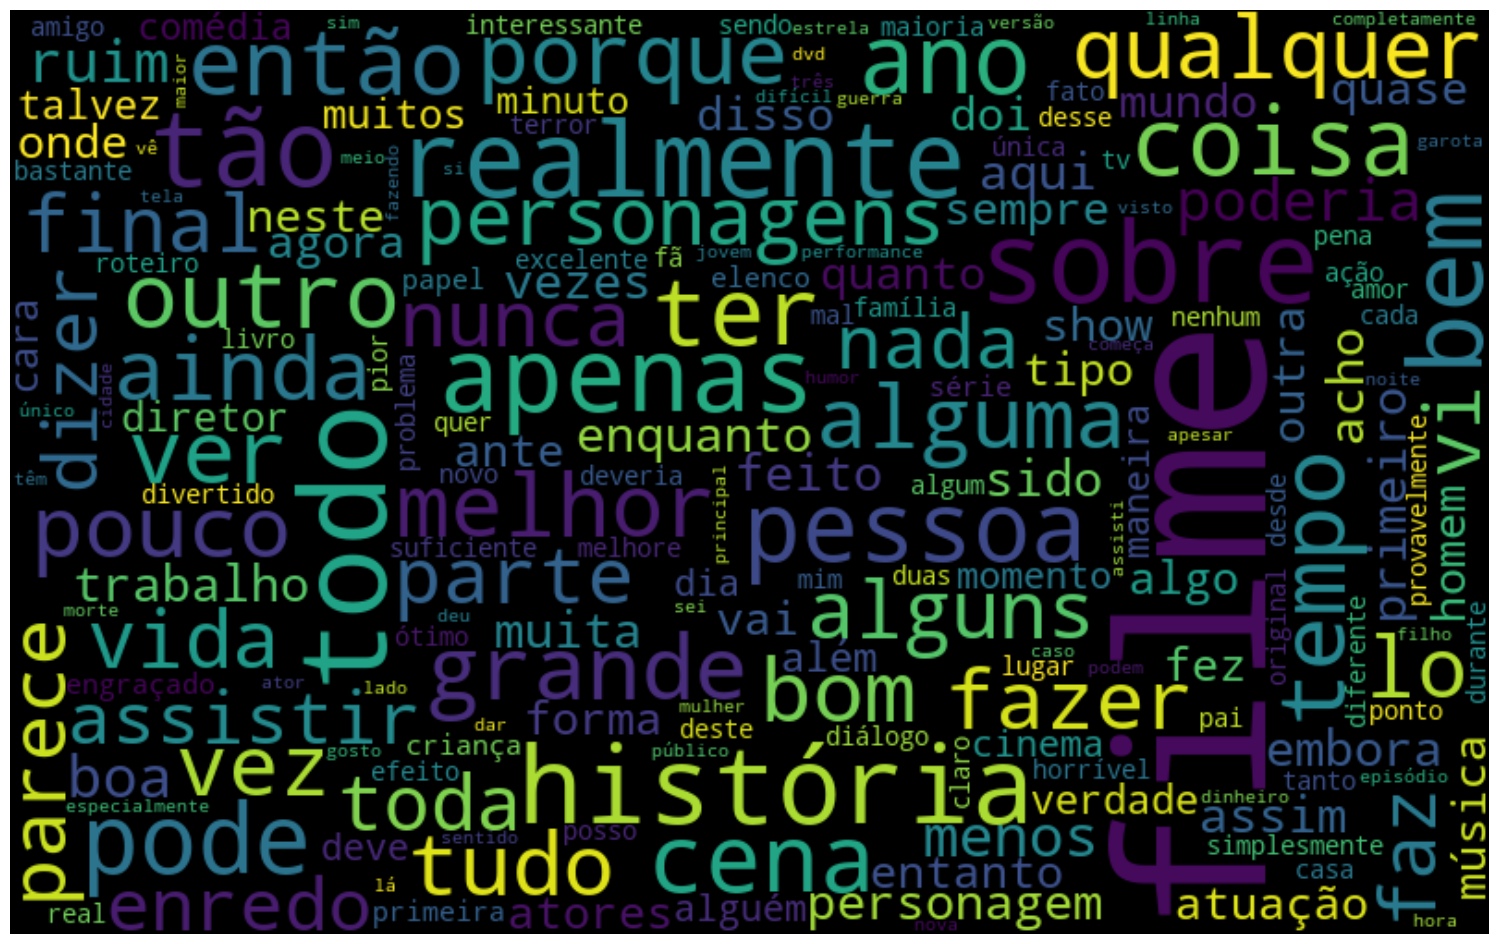

In [22]:
nuvem_palavras(df.new_text_pt)

* Transformar o dataset para o formato numérico, de tal forma que ele possa ser aplicado em alguma algoritmo de aprendizagem. Para isso você pode utilizar o bag of words e TF-IDF (CountVectorizer e TfidfVectorizer);

CountVectorizer será responsável por agrupar as palavras e realizar uma contagem da frequencia de cada uma delas.

Já o TfidfTransformer será responsável por transformar uma matriz em uma matriz normalizada, em que os tokens que ocorrem mais frequentemente tem seu impacto reduzido, assim ele reduz tokens que podem não ser tão informativos quanto outros que aparecem menos frequentemente.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem import WordNetLemmatizer

Bag of Words possibilita transformarmos uma base de dados categóricos em numéricos para que possamos alimentar um algoritmo de aprendizado de máquina como o random forest, além disso é uma forma simples de realizar essa transformação utilizando-se das frequencias das palavras contidas nos textos.

In [32]:
def transformation(token_ls):
    lemmatizer = WordNetLemmatizer()
    lemma_tokens = [lemmatizer.lemmatize(token) for token in token_ls]
    vectorizer = CountVectorizer(lowercase=False, stop_words=palavras_irrelevantes, max_features=1000)
    bow = vectorizer.fit_transform(lemma_tokens) 
    tf_transformer = TfidfTransformer()
    bow_tf = tf_transformer.fit_transform(bow)
    cols = vectorizer.get_feature_names_out()
    df_bow = pd.DataFrame.sparse.from_spmatrix(bow, columns=cols)
    return df_bow
# bow = Bag of Words

In [36]:
# nltk.download('wordnet')

In [38]:
data_num = transformation(df.new_text_pt)
data_num.shape

(49459, 1000)

* (Desafio – Opcional) Utilizando a saída do tópico anterior, treine um modelo utilizando o algoritmo RandomForestClassifier().

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [43]:
y = df['sentiment']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data_num, y, random_state=42)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8225636878285483

In [46]:
from sklearn.metrics import classification_report

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.82      0.82      0.82      6236
         pos       0.82      0.82      0.82      6129

    accuracy                           0.82     12365
   macro avg       0.82      0.82      0.82     12365
weighted avg       0.82      0.82      0.82     12365

